In [18]:
import numpy as np
import matplotlib.pyplot as plt
from axessettings import AxesSetting
import pandas as pd

In [19]:
fp = 5
wp = 2*np.pi*fp
A0 = 10**(106/20)
R = 10000
C = 2.2e-8
Rr = 1000
def A(f):
    return A0/(1+1j*(2*np.pi*f)/wp)
print(3/A(0))
def gain_oc(f,k):
    s = 1j*2*np.pi*f
    return 10*((s*C*R)**2+3*s*C*R+1)/((s*C*R)**2+(3-k*10)*s*C*R+1)
    # return A(f)*((s*C*R)**2+3*s*C*R+1)/((s*C*R)**2+(3-k*A(f))*s*C*R+1)
oscillation = lambda f, k: 20*np.log10(np.abs(gain_oc(f,k)))

(1.5035617008818174e-05+0j)


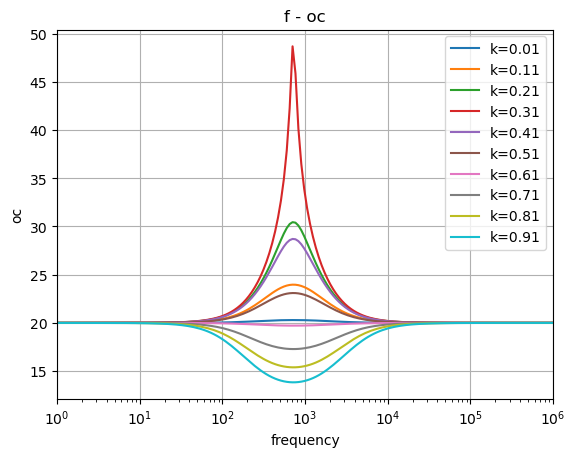

In [20]:
not_osc = pd.read_csv("3_bode_1.268.csv")
osc = pd.read_csv("3_bode_2.78.csv")
large = pd.read_csv("3_bode_7.488.csv")

fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency", ylabel="oc", grid="both", xlim=(1,1e6),xscale="log", title="f - oc")
x = np.geomspace(1,1e7,200)
for k in range (1, 100, 10):
    kd = k*0.01
    ax.plot(x, oscillation(x,kd), label=f"k={kd:.2f}")
    
# ax.scatter(gain_40["freq"], gain_40["phase"], label="measured")
# ax.scatter(not_osc["freq"], 20*np.log10(not_osc["gain"]), label="not oscillating")
# ax.scatter(osc["freq"], 20*np.log10(osc["gain"]), label="oscillating")
# ax.scatter(large["freq"], 20*np.log10(large["gain"]), label="large oscillation")
axstg.apply_axes(ax)

## 開ループ特性

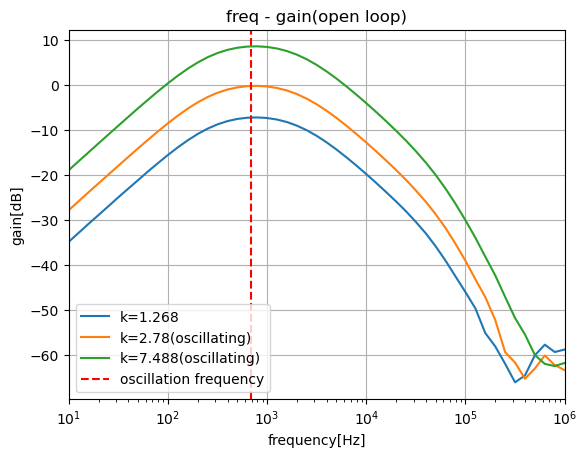

In [43]:
not_osc = pd.read_csv("3_bode_1.268.csv")
osc = pd.read_csv("3_bode_2.78.csv")
large = pd.read_csv("3_bode_7.488.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency[Hz]", ylabel="gain[dB]", grid="both", xlim=(10,1e6),xscale="log", title="freq - gain(open loop)")

ax.plot(not_osc["freq"], 20*np.log10(not_osc["gain"]), label="k=1.268")
ax.plot(osc["freq"], 20*np.log10(osc["gain"]), label="k=2.78(oscillating)")
ax.plot(large["freq"], 20*np.log10(large["gain"]), label="k=7.488(oscillating)")
ax.axvline(x=694, color="red", linestyle="--", label="oscillation frequency")
axstg.apply_axes(ax)

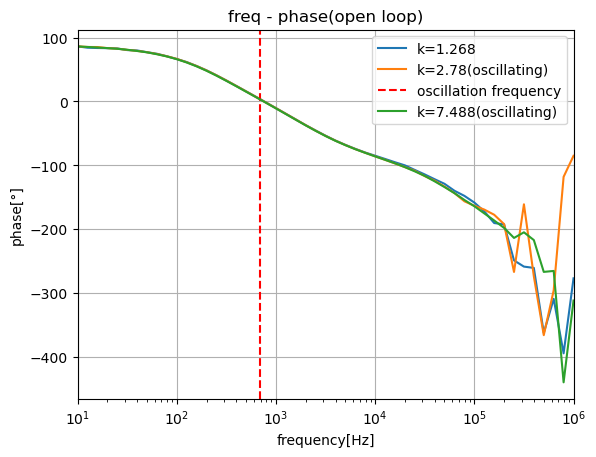

In [44]:

fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency[Hz]", ylabel="phase[°]", grid="both", xlim=(10,1e6),xscale="log", title="freq - phase(open loop)")
ax.plot(not_osc["freq"], not_osc["phase"],label="k=1.268")
ax.plot(osc["freq"], osc["phase"], label="k=2.78(oscillating)")
ax.axvline(x=694, color="red", linestyle="--", label="oscillation frequency")
ax.plot(large["freq"], large["phase"],label="k=7.488(oscillating)")
axstg.apply_axes(ax)

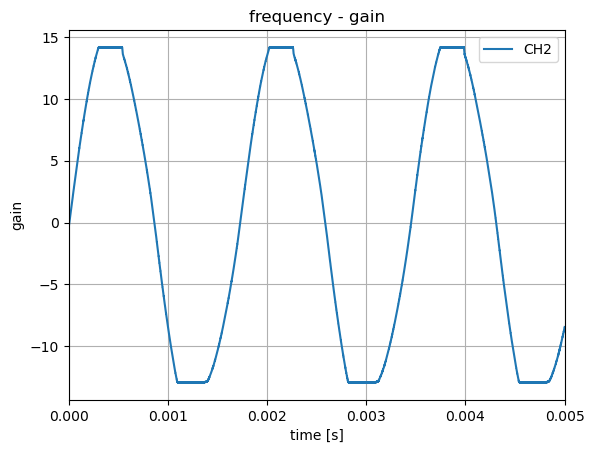

In [23]:

dat = pd.read_csv("3_osc_edge.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True,xlim=(0,0.005),xlabel="time [s]", ylabel="gain", grid="both",title="frequency - gain")
# ax.plot(dat["time"], dat["CH1"], label="CH1")
ax.plot(dat["time"], dat["CH2"], label="CH2")
# ax.plot(dat["time"], dat["CH3"], label="CH3")

axstg.apply_axes(ax)

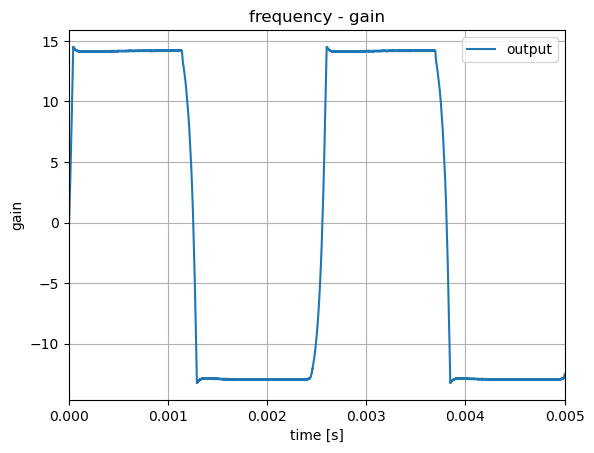

In [24]:

dat = pd.read_csv("3_osc_deep.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True,xlim=(0,0.005),xlabel="time [s]", ylabel="gain", grid="both",title="frequency - gain")
# ax.plot(dat["time"], dat["CH1"], label="input")
ax.plot(dat["time"], dat["CH2"], label="output")
# ax.plot(dat["time"], dat["CH3"], label="output")

axstg.apply_axes(ax)

In [32]:
R_f=9.903e3;R_r=0.9862e3;R_1=9.987e3;R_2=9.9033e3;C_1=24.33e-9;C_2=21.88e-9
A=(R_f+R_r)/R_r
f=1.0/(2*np.pi*np.sqrt(R_1*R_2*C_1*C_2))
print(f)
print(3/A)
print(2.71/10.027)

693.6141203264045
0.27170040039672333
0.2702702702702703


In [ ]:
a = 0.7654
b = 1.8478
A = a+b
A2 = A**2/2-1
L1 = 1/A
C1 = A/A2
L2 = A2**2/(A*(A2-1))
C2 = A*(A2-1)/A2
print(f"L1={L1:.2f}H")
print(f"C1={C1:.2f}F")
print(f"L2={L2:.2f}H")
print(f"C2={C2:.2f}F")


L1=0.38H
C1=1.08F
L2=1.58H
C2=1.53F


In [ ]:
#LPF

# L1 /= 2*np.pi*10
# C1 /= 2*np.pi*1e5
# L2 /= 2*np.pi*10
# C2 /= 2*np.pi*1e5
# print(f"L1={L1:.2e}H")
# print(f"C1={C1:.2e}F")
# print(f"L2={L2:.2e}H")
# print(f"C2={C2:.2e}F")

In [ ]:
#JPF

# L1d = 1/L1/(2*np.pi*1e5)
# C1d = 1/C1/(2*np.pi*1e1)
# L2d = 1/L2/(2*np.pi*1e5)
# C2d = 1/C2/(2*np.pi*1e1)
# print(f"L1={L1d:.2e}F")
# print(f"C1={C1d:.2e}H")
# print(f"L2={L2d:.2e}F")
# print(f"C2={C2d:.2e}H")

In [ ]:
#BPf
a1 = 4.0/3
b1 = 0.5
b2 = 1.5
R = 100
w0 = 2*np.pi*1e4
wb = 3*np.pi*1e4
a1L = a1*R/wb; a1C = wb/(a1*R*w0**2)
b1L = wb*R/(b1*w0**2); b1C = b1/(wb*R)
b2L = wb*R/(b2*w0**2); b2C = b2/(wb*R)
print(f"a1L={a1L:.2e}H , a1C={a1C:.2e}F")
print(f"b1L={b1L:.2e}H , b1C={b1C:.2e}F")
print(f"b2L={b2L:.2e}H , b2C={b2C:.2e}F")

a1L=1.41e-03H , a1C=1.79e-07F
b1L=4.77e-03H , b1C=5.31e-08F
b2L=1.59e-03H , b2C=1.59e-07F


In [ ]:
# BEF
a1 = 1.5
a2 = 0.5
b1 = 4.0/3
R=100
a1L = wb*a1*R/(w0**2); a1C = 1/(wb*a1*R)
a2L = wb*a2*R/(w0**2); a2C = 1/(wb*a2*R)
b1L = R/(b1*wb); b1C = (wb*b1)/(w0**2*R)
print(f"a1L={a1L:.2e}H , a1C={a1C:.2e}F")
print(f"a2L={a2L:.2e}H , a2C={a2C:.2e}F")
print(f"b1L={b1L:.2e}H , b1C={b1C:.2e}F")

a1L=3.58e-03H , a1C=7.07e-08F
a2L=1.19e-03H , a2C=2.12e-07F
b1L=7.96e-04H , b1C=3.18e-07F
